## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_merged.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
# This is a count of the total unique mice
unique_mouse = mouse_merged['Mouse ID'].unique()
print(f'There are {len(unique_mouse)} mice in the test')

There are 249 mice in the test


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_data = mouse_merged[mouse_merged.duplicated(subset=['Mouse ID', 'Timepoint']) == True]
print(f'These are the duplicated values')
display(dup_data)

# Optional: Get all the data for the duplicate mouse ID. 
disp_dups = mouse_merged[mouse_merged['Mouse ID'] == "g989"].head(10)
print(f'This table shows how many times the values are duplicated')
display(disp_dups)

These are the duplicated values


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


This table shows how many times the values are duplicated


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_merged_fixed = mouse_merged[mouse_merged['Mouse ID'] != 'g989']
mouse_merged_fixed.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Checking the number of mice in the clean DataFrame.
len(mouse_merged_fixed['Mouse ID'].unique())

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_summ = mouse_merged_fixed.groupby('Drug Regimen')['Tumor Volume (mm3)']
regimen_mean = regimen_summ.mean()
regimen_median = regimen_summ.median()
regimen_var = regimen_summ.var()
regimen_std = regimen_summ.std()
regimen_count = regimen_summ.count()

regimen_described = pd.DataFrame({'Count':regimen_count,
                                'Mean':regimen_mean,
                                'Median':regimen_median,
                                'Variance':regimen_var,
                                'Standard Deviation':regimen_std})
regimen_described

,Count,Mean,Median,Variance,Standard Deviation
Drug Regimen,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774
Ceftamin,178,52.591172,51.776157,39.290177,6.268188
Infubinol,178,52.884795,51.820584,43.128684,6.567243
Ketapril,188,55.235638,53.698743,68.553577,8.279709
Naftisol,186,54.331565,52.509285,66.173479,8.134708
Placebo,181,54.033581,52.288934,61.168083,7.821003
Propriva,148,52.320930,50.446266,43.852013,6.622085
Ramicane,228,40.216745,40.673236,23.486704,4.846308
Stelasyn,181,54.233149,52.431737,59.450562,7.710419


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summ = mouse_merged_fixed.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([('Count','count'),('Mean','mean'), ('Median', 'median'), ('Variance', np.var), ('Standard Deviation', np.std), ('SEM', st.sem)])
regimen_summ

C:\Users\Jose.Vazquez\Anaconda3P\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Jose.Vazquez\Anaconda3P\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Jose.Vazquez\Anaconda3P\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Count,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

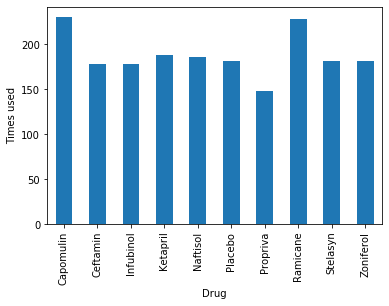

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_group = mouse_merged_fixed.groupby('Drug Regimen')
drug_count = drug_group['Drug Regimen'].count()

drug_chart = drug_count.plot(kind='bar')
drug_chart.set_xlabel("Drug")
drug_chart.set_ylabel("Times used")

plt.show()
plt.tight_layout()


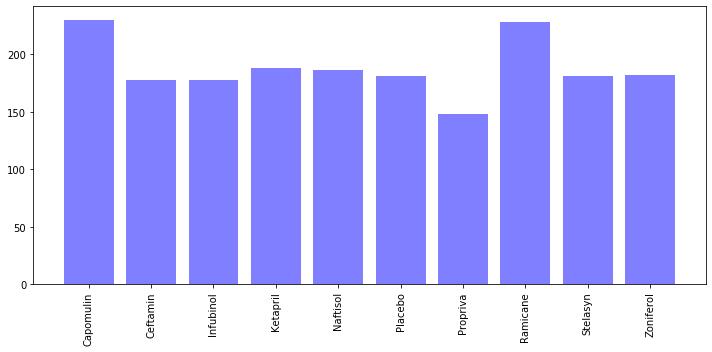

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize=(10,5))
x_axis = list(regimen_summ.index)
plt.bar(x_axis, regimen_count, color='b', alpha=0.5)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

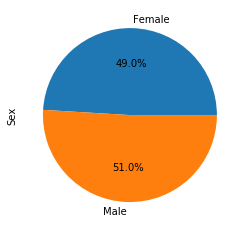

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = mouse_merged_fixed.groupby('Sex')
sex_count = sex_group['Sex'].count()

sex_chart = sex_count.plot(kind='pie', autopct="%1.1f%%")

plt.show()


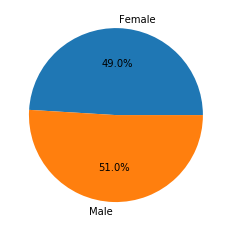

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = list(sex_count.index)
plt.pie(list(sex_count), labels = labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Re-checking the original, merged, and filtered data frame
mouse_merged_fixed.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_tpoint = mouse_merged_fixed[mouse_merged_fixed['Timepoint'] == mouse_merged_fixed['Timepoint'].max()]
mouse_tpoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
from pprint import pprint

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = list(regimen_count.index)
treatments
# Create empty list to fill with tumor vol data (for plotting)
# Thought that creating dicttionary would work as well
tumor_drug = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug = mouse_tpoint[mouse_tpoint['Drug Regimen'] == x]
    vol_list = drug['Tumor Volume (mm3)']

    # add subset 
    tumor_drug[x]=list(vol_list)
    # Determine outliers using upper and lower bounds
          
    # Calculations to get the bounds
    quartiles = vol_list.quantile([0.25, 0.50, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]    
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f'For {x} drug:\nValues below {round(lower_bound, 2)} are potential outliers')
    print(f'Values above {round(upper_bound,2)} are potential outliers')
    print('-------------------------------------\n')
    
          
          
# pprint(tumor_drug)  

For Capomulin drug:
Values below 20.7 are potential outliers
Values above 51.83 are potential outliers
-------------------------------------

For Ceftamin drug:
Values below 52.29 are potential outliers
Values above 76.67 are potential outliers
-------------------------------------

For Infubinol drug:
Values below 55.36 are potential outliers
Values above 75.08 are potential outliers
-------------------------------------

For Ketapril drug:
Values below 56.82 are potential outliers
Values above 84.31 are potential outliers
-------------------------------------

For Naftisol drug:
Values below 49.06 are potential outliers
Values above 88.75 are potential outliers
-------------------------------------

For Placebo drug:
Values below 57.66 are potential outliers
Values above 79.78 are potential outliers
-------------------------------------

For Propriva drug:
Values below 53.38 are potential outliers
Values above 80.5 are potential outliers
-------------------------------------

For Ram

<function matplotlib.pyplot.show(*args, **kw)>

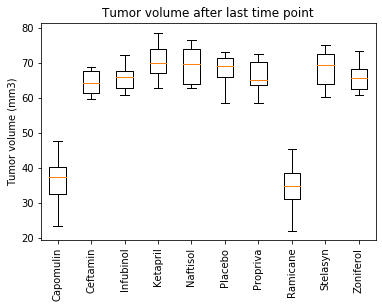

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor volume after last time point')
ax1.set_ylabel('Tumor volume (mm3)')
ax1.boxplot(tumor_drug.values())
ax1.set_xticklabels(tumor_drug.keys(), rotation = 'vertical')
plt.show

## Line and Scatter Plots

,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,45.473753
10,39.113891
15,39.776250
20,36.065835
25,36.617120
30,32.915292
35,30.206825
40,28.167397


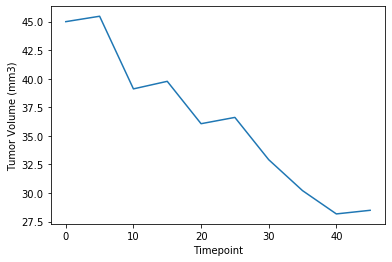

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
m_x401 = mouse_merged_fixed[mouse_merged_fixed['Mouse ID'] == 'x401']
tumor_vol = m_x401[['Timepoint', 'Tumor Volume (mm3)']]
display(tumor_vol.set_index('Timepoint'))
plt.plot(tumor_vol.set_index('Timepoint'))
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
204,i738,Capomulin,Female,23,20,45,37.311846,2
224,w914,Capomulin,Male,24,21,45,36.041047,2


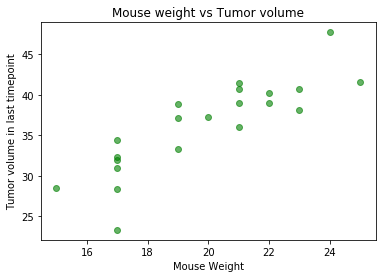

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
vol_capomulin = mouse_tpoint[mouse_tpoint['Drug Regimen'] == 'Capomulin']
weight = vol_capomulin['Weight (g)']
tumor_vol = vol_capomulin['Tumor Volume (mm3)']
met_sites = vol_capomulin['Metastatic Sites']
plt.title("Mouse weight vs Tumor volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor volume in last timepoint")

display(vol_capomulin)

plt.scatter(weight, tumor_vol, marker = 'o', facecolors = 'green', alpha=0.60)
plt.show()

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(weight, tumor_vol)

# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'Summary of Capomulin drug') 
print(f'The correlation between Mouse weight vs Tumor volume is {round(correlation[0],2)}')
print(f'and the linear regression equation  is {line_eq}')

Summary of Capomulin drug
The correlation between Mouse weight vs Tumor volume is 0.85
and the linear regression equation  is y = 1.72x + 2.0
